## Setup

In [21]:
from causallearn.search.FCMBased import lingam
import pandas as pd
import os
from IPython.display import display, Image
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.pyplot as plt
import pydot
import numpy as np
from typing import List

In [22]:
# Get File Paths
google_drive_path = "/Users/andrewstange/Desktop/CMU/Spring_2023/80-816/project/Project_80816/data"

filename = "ChurnForBankCustomers_optbinning.csv"

full_filename = os.path.join(google_drive_path, filename)

assert os.path.isfile(full_filename)

In [23]:
# Convert dataframe to numpy array
df = pd.read_csv(full_filename)
display(df.dtypes)
display(df.head(5))

CreditScore         int64
Geography          object
Gender             object
Age                 int64
Tenure              int64
Balance             int64
NumOfProducts       int64
HasCrCard            bool
IsActiveMember       bool
EstimatedSalary     int64
Exited               bool
dtype: object

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2,France,Female,6,1,0,0,True,True,3,True
1,2,Spain,Female,6,0,1,0,False,True,4,False
2,1,France,Female,6,4,6,1,True,False,4,True
3,5,France,Female,5,0,0,1,False,False,3,False
4,7,Spain,Female,7,1,5,0,True,True,2,False


In [24]:
for col in df.columns:
    unique_vals = sorted(df[col].unique())
    data_to_num = {data: num for num, data in enumerate(unique_vals)}
    df[col] = df[col].map(data_to_num)

display(df.dtypes)
display(df.head(5))

CreditScore        int64
Geography          int64
Gender             int64
Age                int64
Tenure             int64
Balance            int64
NumOfProducts      int64
HasCrCard          int64
IsActiveMember     int64
EstimatedSalary    int64
Exited             int64
dtype: object

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2,0,0,6,1,0,0,1,1,3,1
1,2,2,0,6,0,1,0,0,1,4,0
2,1,0,0,6,4,6,1,1,0,4,1
3,5,0,0,5,0,0,1,0,0,3,0
4,7,2,0,7,1,5,0,1,1,2,0


## Run LiNGAM

In [29]:
data = df.to_numpy()

# default parameters
model = lingam.ICALiNGAM()    
res = model.fit(data)

print(res.causal_order_)
print(res.adjacency_matrix_)

# visualization using networkx
def to_pydot(G: np.array, ordering: np.array, labels: List[str] | None = None, title: str = "", dpi: float = 200):
    '''
    Convert an adjacency matrix to a DOT object.

    G is the estimated adjacency matrix B of the fitted model
    ordering is the causal order of the fitted model.
    '''

    assert len(labels) == G.shape[0]
    pydot_g = pydot.Dot(title, graph_type="digraph", fontsize=18)
    pydot_g.obj_dict["attributes"]["dpi"] = dpi

    # Ordering gives a mapping from matrix row index to feature index in original dataframe
    for i in range(G.shape[0]):
        pydot_g.add_node(pydot.Node(i, label=labels[ordering[i]]))

    # LiNGAM edge weights can be positive or negative, show an edge as long as non-zero
    for idx in range(G.shape[0]):
        for jdx in range(G.shape[1]):
            if G[idx, jdx] != 0:
                dot_edge = pydot.Edge(idx, jdx, dir='both', arrowtail='none', arrowhead='normal')
                pydot_g.add_edge(dot_edge)

    return pydot_g

pdy = to_pydot(res.adjacency_matrix_, res.causal_order_, labels=df.columns)



/opt/miniconda3/envs/causal_env/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


[2, 6, 7, 8, 0, 9, 10, 1, 3, 4, 5]
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.06638379]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.44171941  0.          2.43018116]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.14166807  0.          0.          0.          0.
  -1.41169123  0.          0.          0.          0.25917204]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         

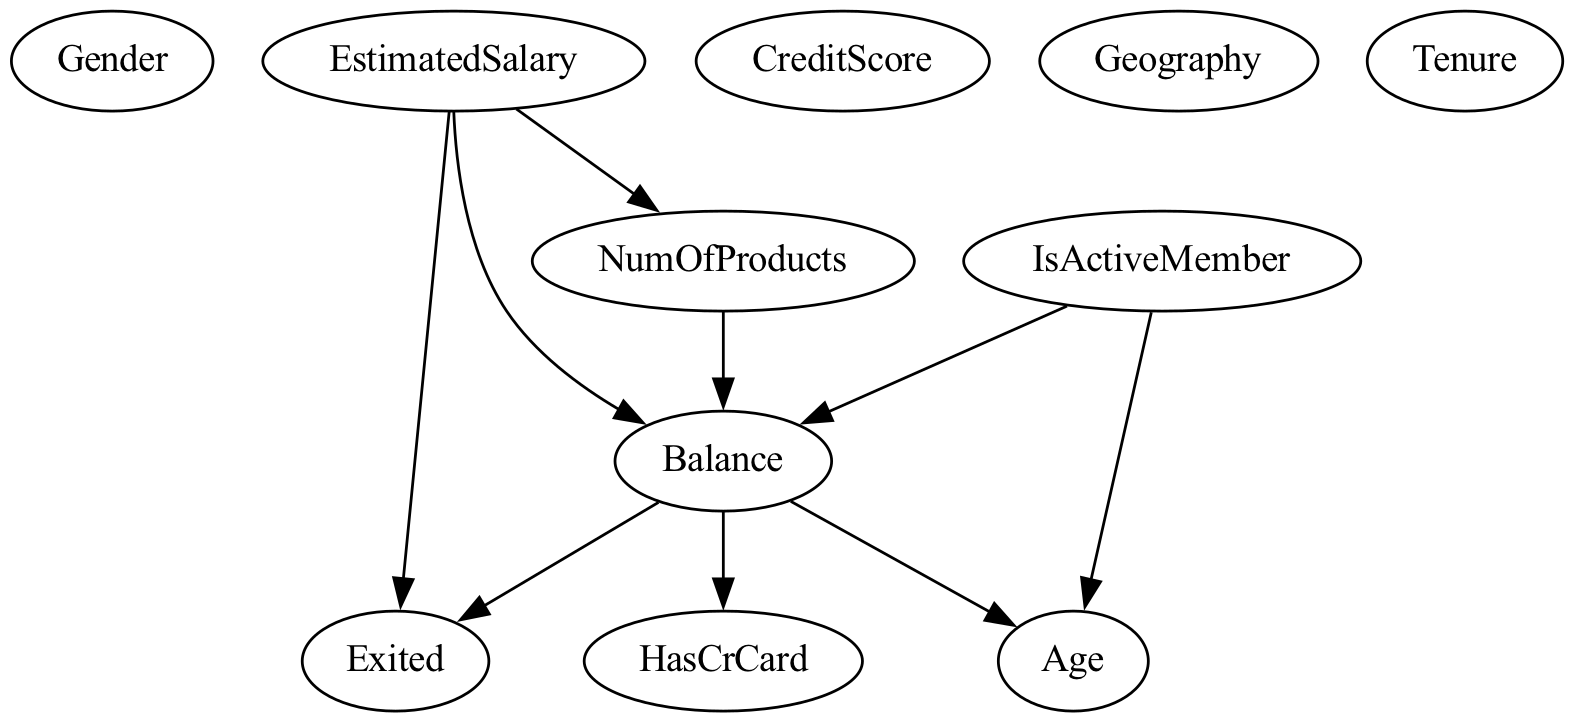

In [30]:
# Note that I had to install graphviz with:
#   brew install graphviz
filename = "LiNGAM_Output.png"
pdy.write_png(filename)
Image(filename=filename)